###Importing model

In [ ]:
import circle_model
import square_model
import star_model
# more to be included....

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.8841 - loss: 0.2627 - val_accuracy: 1.0000 - val_loss: 9.0614e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 1.0000 - loss: 7.1935e-05 - val_accuracy: 1.0000 - val_loss: 4.1010e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - accuracy: 1.0000 - loss: 3.5942e-05 - val_accuracy: 1.0000 - val_loss: 2.4571e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 1.0000 - loss: 2.2224e-05 - val_accuracy: 1.0000 - val_loss: 1.6215e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 1.0000 - loss: 1.4927e-05 - val_accuracy: 1.0000 - val_loss: 1.1437e-05
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.8903 - loss: 0.3114 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 1.0000 - loss: 7.2084e-04 - val_accuracy: 1.0000 - val_loss: 8.2230e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 1.0000

In [ ]:
import pickle

# Load the model
with open('model_circle.pkl', 'rb') as file1:
    model_circle= pickle.load(file1)

# Load the model
with open('model_square.pkl', 'rb') as file2:
    model_square= pickle.load(file2)

# Load the model
with open('model_star.pkl', 'rb') as file3:
    model_star= pickle.load(file3)

###Reshaping data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    result = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            for k in range(XY.shape[0]):
                result.append([i, XY[k, 0], XY[k, 1]])
    return np.array(result)

csv_path1="isolated.csv"

output_data1=read_csv(csv_path1)
# output_data2=read_csv(csv_path2)

In [ ]:
print(output_data1)

[[  0.         109.14299774 125.58000183]
 [  0.         110.15747833 125.49578094]
 [  0.         111.17194366 125.40398407]
 ...
 [  2.           5.6753335    1.34307408]
 [  2.           7.1833334    1.5595926 ]
 [  2.           8.69999981   1.41700006]]


In [ ]:
import numpy as np

# Sample data format provided by the user
data = output_data1

# Group points by part number
grouped_data = {}
for row in data:
    part_number = int(row[0])
    if part_number not in grouped_data:
        grouped_data[part_number] = []
    grouped_data[part_number].append(row[1:])

# Convert lists to numpy arrays for clustering
for key in grouped_data:
    grouped_data[key] = np.array(grouped_data[key])

grouped_data  # Display the grouped data


{0: array([[109.14299774, 125.58000183],
        [110.15747833, 125.49578094],
        [111.17194366, 125.40398407],
        [112.18638611, 125.30522156],
        [113.20079041, 125.20011139],
        [114.21517181, 125.08926392],
        [115.22950745, 124.97328949],
        [116.2437973 , 124.85279083],
        [117.25804138, 124.72838593],
        [118.27222443, 124.60068512],
        [119.28635406, 124.47029877],
        [120.30041504, 124.33782959],
        [121.31440735, 124.2039032 ],
        [122.32831573, 124.06912231],
        [123.34214783, 123.93410492],
        [124.355896  , 123.79945374],
        [125.36954498, 123.66577911],
        [126.38310242, 123.53369141],
        [127.39655304, 123.40380859],
        [128.40989685, 123.27674103],
        [129.42312622, 123.15309143],
        [130.43623352, 123.03347778],
        [131.44923401, 122.91851044],
        [132.46208191, 122.80879974],
        [133.47480774, 122.70494843],
        [134.48739624, 122.60758209],
        [

###Making clusters

In [ ]:
from sklearn.cluster import DBSCAN

# Set DBSCAN parameters
eps = 1.0  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 3  # Number of points required to form a dense region (a cluster)

clusters = {}
for key in grouped_data:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(grouped_data[key])
    clusters[key] = cluster_labels

clusters  # Display the cluster labels


{0: array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -

###DBSCAN

In [ ]:
# Adjusted DBSCAN parameters
eps = 5.0  # Increase the distance threshold
min_samples = 2  # Decrease the minimum samples required to form a cluster

# Re-apply DBSCAN clustering to each group
clusters_adjusted = {}
for key in grouped_data:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(grouped_data[key])
    clusters_adjusted[key] = cluster_labels

clusters_adjusted  # Display the new cluster labels


{0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 

###Ploting Separated shapes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
The sequence is recognized as a star.


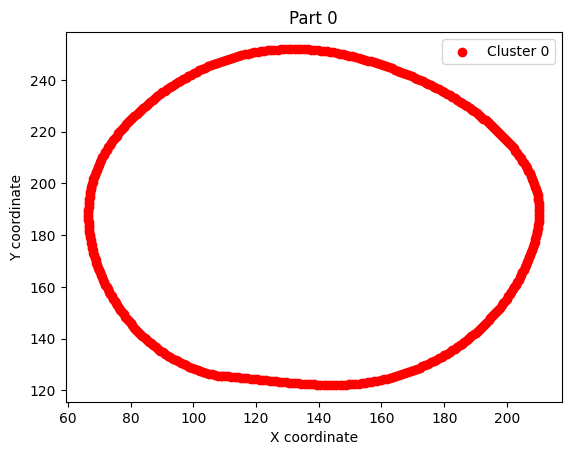

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
The sequence is recognized as a circle.


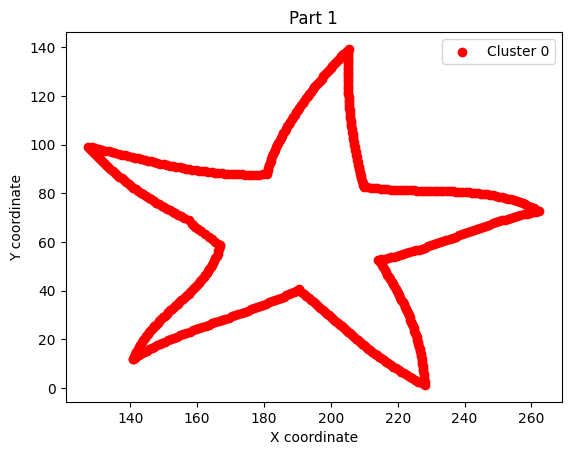

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The sequence is recognized as a circle.


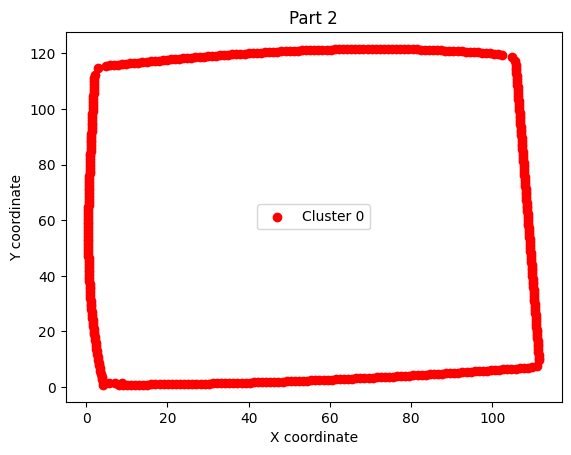

In [ ]:
import matplotlib.pyplot as plt

# Function to plot clusters
def plot_clusters(grouped_data, clusters):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    for key in grouped_data:
        plt.figure()
        for cluster_label in np.unique(clusters[key]):
            cluster_points = grouped_data[key][clusters[key] == cluster_label]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', color=colors[cluster_label % len(colors)])
            # Dynamically calculate the reshape dimensions based on the number of points in the cluster
            num_points = cluster_points.shape[0]
            cluster_points1 = cluster_points.reshape(1, num_points, 2)  # Reshape to (1, num_points, 2)
            prediction_circle=model_circle.predict(cluster_points1)
            prediction_square=model_square.predict(cluster_points1)
            prediction_star=model_star.predict(cluster_points1)
            if prediction_circle > 0.5:
              print("The sequence is recognized")
            elif(prediction_square>0.5):
              print("The sequence is recognized")
            elif(prediction_star>0.5):
              print("The sequence is recognized")
            else:
              print('not found')
        plt.title(f'Part {key}')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.legend()
        plt.show()

# Call the function with the new clusters
plot_clusters(grouped_data, clusters_adjusted)

###Regularised Component1(circle) of given example (isolated)

In [ ]:
from scipy.optimize import least_squares

def fit_circle(x, y):
    # Initial guess for the circle parameters (center_x, center_y, radius)
    x_m = np.mean(x)
    y_m = np.mean(y)
    initial_guess = [x_m, y_m, np.std(x)]

    def calc_radius(xc, yc):
        return np.sqrt((x - xc)**2 + (y - yc)**2)

    def cost_function(params):
        xc, yc, r = params
        return calc_radius(xc, yc) - r

    # Optimize to find the best circle parameters
    result = least_squares(cost_function, initial_guess)
    xc, yc, r = result.x
    return xc, yc, r

# Example usage with distorted circle data
x, y = distorted_circle_data[:, 0], distorted_circle_data[:, 1]
xc, yc, radius = fit_circle(x, y)
print(f"Fitted circle center: ({xc}, {yc}), radius: {radius}")


Fitted circle center: (0.0017694729851979035, 0.023451810748156172), radius: 1.0364241948955673


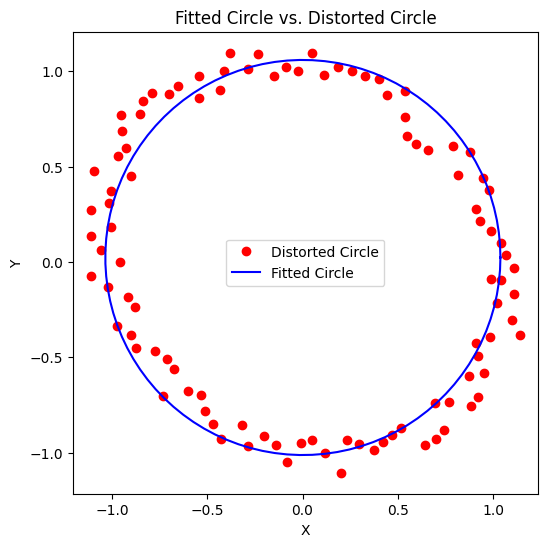

In [ ]:
def generate_fitted_circle(xc, yc, radius, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x_fit = xc + radius * np.cos(theta)
    y_fit = yc + radius * np.sin(theta)
    return np.array([x_fit, y_fit]).T

# Generate the circle points
fitted_circle = generate_fitted_circle(xc, yc, radius)

# Plot the original distorted points and the fitted circle
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'ro', label='Distorted Circle')
plt.plot(fitted_circle[:, 0], fitted_circle[:, 1], 'b-', label='Fitted Circle')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Circle vs. Distorted Circle')
plt.axis('equal')
plt.show()
